# Final project: Neural Networks

Nathan Kluth

# Introduction

In this notebook I will be looking through health data to train a neural network on identifying risk factors.

I found this dataset to be interesting due to the possible beneficial implications of discovering which traits can be predictors of heart disease. The potential for machine learning to help people and improve quality of life in patients was a big motivator for picking this dataset. Even if contrived, it was interesting to work on a dataset that had to do with health data.

I had to prepare the data from 4 different sources, and then used the Neural Network algorithm supplied in class, as well as outside neural network methods fro SciKit, to parse the data and train a model. In the last section I summarize the results and talk about challenges I faced.

### Data

Prepping the data will take some time. It's coming from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

The data was collected for this dataset from 4 sources:
 1. Cleveland Clinic Foundation (cleveland.data)
 2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
 3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
 4. University Hospital, Zurich, Switzerland (switzerland.data)

Heart disease data is provided at the above link. The data contains other health information for a patient. I will train a system to identify heart disease risk based on the other data points.

The data had many more attributes, but was narrowed down to 14:

- Attribute Information:
-- Only 14 used
      -- 1. age: age in years    
      -- 2. sex: sex (1 = male; 0 = female)    
      -- 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic      
      -- 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
      -- 5. chol: serum cholesterol in mg/dl     
      -- 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
      -- 7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
           depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      -- 8. thalach: maximum heart rate achieved 
      -- 9. exang: exercise induced angina (1 = yes; 0 = no)  
      -- 10. oldpeak = ST depression induced by exercise relative to rest
      -- 11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping   
      -- 12. ca: number of major vessels (0-3) colored by flourosopy     
      -- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect      
      -- 14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing (absence of heart disease).
        -- Value 1 or higher: presence of heart disease. 
        
#14 is the item I'm trying to predict based on the other attributes. A few of the datasets use 0 and 1 to distinguish no heart disase vs. heart disease in a patient. Others used a scale of 0 (no heart disased) and 1-4 to show severity. I will be looking for absence of heart disease (0) or presence of heart disease (any positive number).

From the dataset, download the 4 different sets that are procceded by `processed` - They are csv files but lack the filetype extension so I added that manually 

Let's look at cleveland

In [426]:
# pandas used to pull in the data 
import pandas as pd

# data will be the final data set that is fed to training/testing algorithms
data = pd.read_csv('processed.cleveland.data.csv', names = ["Age", "Sex", "Chest Pain", "Resting BP", "Cholesterol", "Fasting Blood Sugar", "Resting ECG", "Maximum Heart Rate", "Exercise Induced Angina", "ST depression", "Slope ST", "Colored vessels", "Thal", "Diagnosis"])
data

,Age,Sex,Chest Pain,Resting BP,Cholesterol,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate,Exercise Induced Angina,ST depression,Slope ST,Colored vessels,Thal,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Excellent. Looks good. Here is a dataset that only used 0 and 1:

In [427]:
data = pd.read_csv('processed.hungarian.data.csv', names = ["Age", "Sex", "Chest Pain", "Resting BP", "Cholesterol", "Fasting Blood Sugar", "Resting ECG", "Maximum Heart Rate", "Exercise Induced Angina", "ST depression", "Slope ST", "Colored vessels", "Thal", "Diagnosis"])
data

,Age,Sex,Chest Pain,Resting BP,Cholesterol,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate,Exercise Induced Angina,ST depression,Slope ST,Colored vessels,Thal,Diagnosis
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


Notice that it's not totally complete. Let's combine all the datasets and then replace those `?`s. Also, the ocassional attribute is a string and not a float, and will need to be parsed. Luckily, float(str) and float(float) both work and return the desired result. So `p2f` below will always return a float unless the value is `?`. I chose to use 0, though I'm not sure if there is a better option for that.

In [428]:
def p2f(x):
    if (x == '?'):
        return 0
    else:
        return float(x)

def createBigDataSet(csvs):
    dataRead = pd.DataFrame();
    
    names = names = ["Age", "Sex", "Chest Pain", "Resting BP", "Cholesterol", "Fasting Blood Sugar", "Resting ECG", "Maximum Heart Rate", "Exercise Induced Angina", "ST depression", "Slope ST", "Colored vessels", "Thal", "Diagnosis"]
    converters = {
        "Age": p2f,
        "Sex": p2f,
        "Chest Pain": p2f,
        "Resting BP": p2f,
        "Cholesterol": p2f,
        "Fasting Blood Sugar": p2f,
        "Resting ECG": p2f,
        "Maximum Heart Rate": p2f,
        "Exercise Induced Angina": p2f,
        "ST depression": p2f,
        "Slope ST": p2f,
        "Colored vessels": p2f,
        "Thal": p2f,
        "Diagnosis": p2f
    }
    
    for csv in csvs:
        read = pd.read_csv(csv, names = names, converters=converters)
        dataRead = dataRead.append(read)
        
    return dataRead

In [429]:
data = createBigDataSet(['processed.cleveland.data.csv', 'processed.hungarian.data.csv', 'processed.va.data.csv', 'processed.switzerland.data.csv'])
data['Diagnosis'] = data['Diagnosis'].replace(2, 1).replace(3, 1).replace(4, 1) #just predicting not exists/exists

data.shape

(920, 14)

And now we can setup the columns we want to predict:

In [430]:
X = data.drop('Diagnosis', axis=1)
Y = data['Diagnosis']
# X is data - now without the Diagnosis column

# used for TrainNNs
target_data = Y.values.reshape((-1, 1))
X_data = data.values

We are now ready to start testing and training! X contains a pataframe of all above columns minus the goal column, and Y is just those values from goal column.

## External files - CSU

These files are from CSU Professor [Chuck Anderson](http://www.cs.colostate.edu/~anderson/wp/)

In [431]:
## Brought in from outisde file
import neuralnetworks as nns
import scaledconjugategradient as scg
import mlutils as ml

TrainNNs is a function I wrote for assignment 6. This function returns `results` which is list with one element for each network structure tested.  Each element is a list containing 
* the hidden layer structure (as a list),
* a list of training data performance for each repetition, 
* a list of testing data performance for each repetition, and
* the number of seconds it took to run this many repetitions for this network structure

In [432]:
import time

def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    results = []
    t0 = time.time()

    for layer in hiddenLayerStructures:
        trainDataPerf = []
        testDataPerf = []
        
        for rep in range(numberRepetitions):
            # partition data set into train/test
            Xtrain,Ttrain,Xtest,Ttest = ml.partition(X, T, (trainFraction, 1-trainFraction), classify);

            # create a neural network of the given structure
            nnet = nns.NeuralNetwork(Xtrain.shape[1], layer, Ttrain.shape[1]);

            # train it for numberIterations
            nnet.train(Xtrain, Ttrain, numberIterations)
            # use the trained network to produce outputs for the training and for the testing sets
            Y = nnet.use(Xtrain)
            Ytest, _ = nnet.use(Xtest, allOutputs=True)

            trainingResult = None
            testingResult = None
            if (classify):
                # calculate the fraction of samples incorrectly classififed for training and testing sets. 
                values,counts = np.unique(Ttrain, return_counts=True)
                values2,counts2 = np.unique(Ttest, return_counts=True)
                
                trainingResult = (counts / Ttrain.shape[0]).tolist()
                testingResult = (counts2 / Ttest.shape[0]).tolist()
                
                # add the training and testing preformance to a collection (such as a list) for this network structure
                trainDataPerf = trainDataPerf + trainingResult
                testDataPerf = testDataPerf + testingResult
            else:
                # calculate RMSE of trainng and testing sets
                trainingResult = np.sqrt(np.mean((Y-Ttrain)**2))
                testingResult = np.sqrt(np.mean((Ytest-Ttest)**2))
                
                # add the training and testing preformance to a collection (such as a list) for this network structure
                trainDataPerf = trainDataPerf + [trainingResult]
                testDataPerf = testDataPerf + [testingResult]
            
        # add to a collection iof all results the hidden layer structure, 
        # lists of training performance and testing performance, and seconds taken to do these repeitions
        results += [[layer, trainDataPerf, testDataPerf, time.time() - t0]]
    return results

`summarize` and `bestNetwork` are a few helper functions for interpreting `trainNNs` resuls

In [433]:
import copy as cp

def summarize(results): 
    summary = cp.deepcopy(results)
    
    for summ in summary:
        summ[1] = float(sum(summ[1])) / len(summ[1])
        summ[2] = float(sum(summ[2])) / len(summ[2])
    return summary

In [434]:
def bestNetwork(summary):
    best = float('inf')
    bestIndex = -1
    for (index, network) in enumerate(summary):
        if (network[2] < best):
            best = network[2]
            bestIndex = index
            
    return summary[bestIndex]

## External Files - Scikit
These files are from [SciKit](http://scikit-learn.org/)

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## NumPy

In [436]:
import numpy as np

# Methods

Here is SciKits results:

In [437]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10),max_iter=20000)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [438]:
predictions = mlp.predict(X_test)
target_names = ['No heart disease', 'Heart disease present']
print(classification_report(Y_test,predictions, target_names=target_names))


                       precision    recall  f1-score   support

     No heart disease       0.49      0.83      0.62       106
Heart disease present       0.64      0.26      0.37       124

          avg / total       0.57      0.52      0.48       230



Not great... As you can see above I had to add a lot of hidden layer and max iterations in order to get 70% accuracy.

What about the code from myself with base code from Professor Anderson?

In [439]:
CSUNN = trainNNs(X_data, target_data, 0.8, [0, 5, [5, 5]], 5, 100000, classify=True)

In [440]:
summarize(CSUNN)

[[0, 0.5, 0.5, 0.035264015197753906],
 [5, 0.5, 0.5, 4.4327521324157715],
 [[5, 5], 0.5, 0.5, 31.61199712753296]]

In [441]:
bestNetwork(summarize(CSUNN))

[0, 0.5, 0.5, 0.035264015197753906]

As with assignment 6, 0 hidden layers wins due to small dataset. I still see really poor accuracy.

## Random Forest
We didn't talk much about random forest, but I do know it is a pretty common example algorithm in machine learning. Let's take a look at it:

In [442]:
rF = RandomForestClassifier()
rF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [443]:
predictionsRF = rF.predict(X_test)

print(classification_report(Y_test,predictionsRF, target_names=target_names))

                       precision    recall  f1-score   support

     No heart disease       0.74      0.89      0.81       106
Heart disease present       0.88      0.73      0.80       124

          avg / total       0.82      0.80      0.80       230



Hey! Slightly better. Even with default params it outperforms the MLP model and trainNNs from above.

# Results

Here are a few graphs of the results, which are printed above in a less pretty format

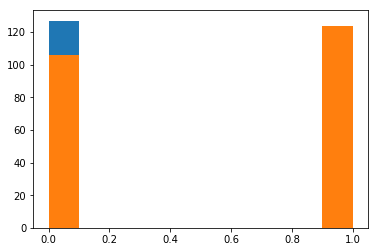

In [444]:
import matplotlib.pyplot as plt
plt.hist(predictionsRF)
plt.hist(Y_test)

plt.show()

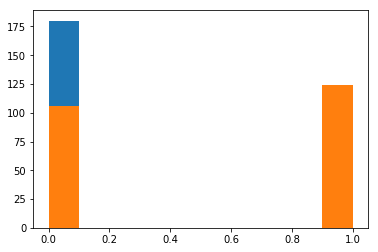

In [445]:
import matplotlib.pyplot as plt
plt.hist(predictions)
plt.hist(Y_test)

plt.show()

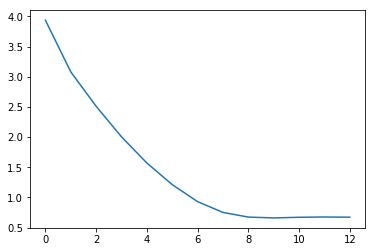

In [446]:
plt.subplot()
plt.plot(mlp.loss_curve_)
plt.show()

I want to try a test with just one dataset to see if the differences between the 4 sets is causing an issue with predicting a result

In [447]:
clevelandData = createBigDataSet(['processed.cleveland.data.csv'])
clevelandData['Diagnosis'] = clevelandData['Diagnosis'].replace(2, 1).replace(3, 1).replace(4, 1)

X_clev = clevelandData.drop('Diagnosis', axis=1)
Y_clev = clevelandData['Diagnosis']

X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_clev, Y_clev)
mlpC = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10),max_iter=20000)
mlpC.fit(X_train_c,Y_train_c)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [448]:
predictions = mlpC.predict(X_test_c)
target_names = ['No heart disease', 'Heart disease present']
print(classification_report(Y_test_c,predictions, target_names=target_names))

                       precision    recall  f1-score   support

     No heart disease       0.33      0.03      0.05        37
Heart disease present       0.51      0.95      0.66        39

          avg / total       0.42      0.50      0.36        76



Not much better - I think this can confirm that I at least accounted for differences in the datasets I was combining.

# Conclusion

Using sklearn was pretty handy. That plus pandas opens a lot of options for how to work with data since I didn't have to think about it so hard. Even though there seems to be a lot of effor put into these libraries, I was still a little disillusioned by the difficulty in finding a good dataset, and parseing it.

Random Forest did seem to perform better, and I am interested in learning more about it and why that is beyond just using it as a method call. Even with Random Forest and sklearn, the results were not very accurate. And `TrainNNs` had very bad accuracy. I don't know if this is because of some indicators that should be removed as unhelpful, or if these attributes showed low correlation to heart disease.

Issues: I had a lot of problems debugging and figuring out what results meant. If they were wrong, I wasn't really sure how to fix it or why. I could step through certain bugs (like figuring out some of the data was strings, some floats), but the results were sort of black-box to me. Definitely an area I aim to improve upon. I am also planning to work on the data visualization side of the equation - figuring out the best model to display data (and also, learning to use matplotlib better).

Future work: I wanted to see which values had the highest impact on the results, but ran out of time. I hope to add to this notebook with those properties in the future. I also hoped to use another library like Google's TensorFlow but was unable to quickly get something up and running with that library. It seems very powerful, but very complicated.

I will be taking more AI courses through CSU. I really enjoyed this one! Thanks so much!

## References

- Professor Chuck Anderson. Colorado State University [http://www.cs.colostate.edu/~anderson/wp/](http://www.cs.colostate.edu/~anderson/wp/)
- UCI Machine learning reposity. Data from 4 different principal investigators:
       1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.